# **Aprendizado de Máquina**<BR> **Aula 02** - Modelos de regressão linear e não linear

# **Exemplo 1**: regressão linear com <u>dados externos</u>

## **1)** Importação de bibliotecas e classes

In [ ]:
import pandas as pd                   # Leitura de dados e operações em DataFrames
from matplotlib import pyplot as plt  # Geração de gráficos
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

## **2)** Leitura de dados e exploração inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Obs.: "monte" o disco e obtenha o caminho do arquivo de dados
# antes de executar esta célula (caso contrário, ocorrerá erro)

caminho_arquivo = "/content/drive/MyDrive/Colab Notebooks/Aula2_ML/A02Ex1_carros.csv"

df = pd.read_csv(caminho_arquivo)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


### **2.1)** Visualização do *DataFrame*

In [ ]:
# Exibição "completa" do DataFrame
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,USA,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,USA,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger


###**2.2)** Informações gerais

In [ ]:
# Dimensões do DataFrame
df.shape

(392, 9)

In [ ]:
# Tipos de dados das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [ ]:
# Resumo estatístico
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### **2.3)** Correlações

In [ ]:
# Análise das correlações lineares
# Critério: |r| entre 0 e 0,4: fraca
#           |r| acima de 0,4 e abaixo de 0,7: moderada
#           |r| maior ou igual a 0,7: forte


In [ ]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


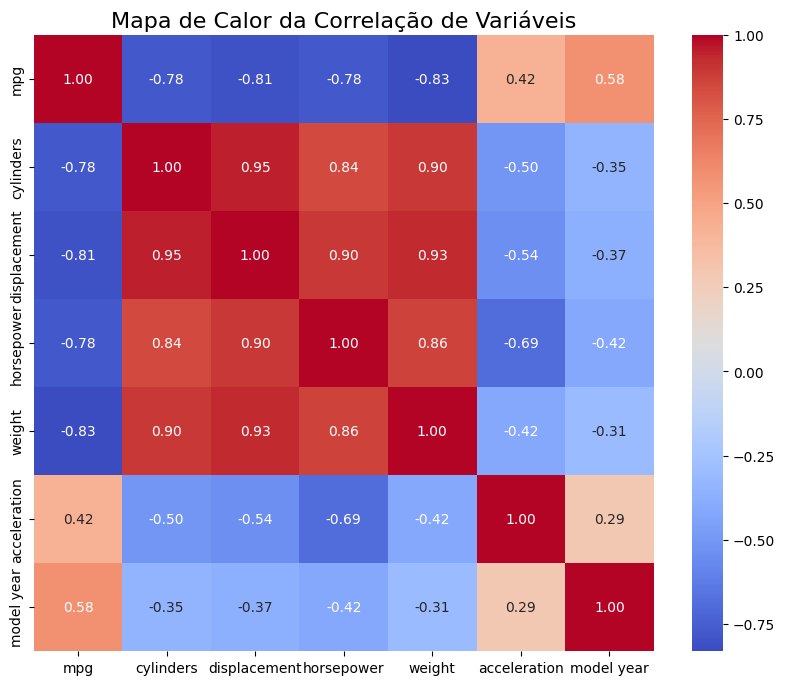

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')

plt.title('Mapa de Calor da Correlação de Variáveis', fontsize=16)

plt.show()

## **3)** Seleção de variáveis

In [ ]:
y = df['mpg']
X = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

print("Dimensões de 'y':", y.shape)
print("Dimensões de 'X':",X.shape)

Dimensões de 'y': (392,)
Dimensões de 'X': (392, 6)


## **4)** Treinamento do modelo de regressão linear simples

In [ ]:
# Forma do modelo: y^ = f(x1) = theta_0 + theta_1*x1

reg1 = LinearRegression()   # Cria instância do objeto "modelo de regressão  linear"
reg1.fit(X,y)               # Treina o modelo com todos os dados disponíveis

LinearRegression()

### **4.1)** Coeficientes do modelo e qualidade do ajuste

In [ ]:
# Exibe os coeficientes do modelo
print("Theta_0:", reg1.intercept_)
print("Theta_1:", reg1.coef_)

# Exibe o valor de R^2
print("R^2:", reg1.score(X,y))

Theta_0: -14.535250480506132
Theta_1: [-3.29859089e-01  7.67843024e-03 -3.91355574e-04 -6.79461791e-03
  8.52732469e-02  7.53367180e-01]
R^2: 0.8092552890383932


## **5)** Treinamento do modelo de regressão linear múltipla

In [ ]:
# Forma do modelo: y^ = f(x1,x2) = theta_0 + theta_1*x1 + theta_2*x2

# Nova seleção de de variáveis
y2 = df['mpg']
X2 = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']]

# Treinamento do modelo
reg2 = LinearRegression()
reg2.fit(X2,y2)

LinearRegression()

### **5.1)** Coeficientes do modelo e qualidade do ajuste

In [ ]:
# Coeficientes

print("Theta_0:", reg2.intercept_)
print("Theta_1 e Theta_2:", reg2.coef_)

Theta_0: -14.535250480506132
Theta_1 e Theta_2: [-3.29859089e-01  7.67843024e-03 -3.91355574e-04 -6.79461791e-03
  8.52732469e-02  7.53367180e-01]


In [ ]:
# Função para o cálculo do coeficiente de determinação da regressão
# linear simples (R^2) ou múltipla (R^2 ajustado):

def R2_R2ajust(estimador,X,y):
  R2 = estimador.score(X,y)  # R^2
  n = len(y)      # Quantidade de dados de treino
  m = X.shape[1]  # Quantidade de variáveis independentes do modelo
  if m == 1:
    return R2   # Regressão simples: retorna R^2
  else:
    return 1-((n-1)/(n-m-1))*(1-R2)  # Regressão múltipla: R^2 ajustado

In [ ]:
# Qualidade do ajuste

print("Coeficiente de determinação AJUSTADO:", R2_R2ajust(reg2,X,y))

Coeficiente de determinação AJUSTADO: 0.8062826441922383


## **6)** Previsão pontual (regressão múltipla)

In [ ]:
# Dicionário de previsão
novos_carros = {
    'cylinders': [4, 8],
    'displacement': [150, 350],
    'horsepower': [90, 175],
    'weight': [2200, 4000],
    'acceleration': [15, 12],
    'model year': [80, 75]
}

# Conversão para DataFrame
novos_carros_df = pd.DataFrame.from_dict(novos_carros)

print("Dados dos Carros para Previsão")
display(novos_carros_df)


# Previsões
previsoes_mpg = reg2.predict(novos_carros_df)


print("\nPrevisões de Consumo (mpg)")
novos_carros_df['mpg_previsto'] = previsoes_mpg
display(novos_carros_df)

Dados dos Carros para Previsão


,cylinders,displacement,horsepower,weight,acceleration,model year
0,4,150,90,2200,15,80
1,8,350,175,4000,12,75



Previsões de Consumo (mpg)


,cylinders,displacement,horsepower,weight,acceleration,model year,mpg_previsto
0,4,150,90,2200,15,80,31.862169
1,8,350,175,4000,12,75,15.792186


---
**Fim do Exemplo 1 da Aula 02**